# Exploratory Data Analysis

In [25]:
%matplotlib inline

# ignore deprecated warning
import warnings
warnings.filterwarnings("ignore")

# data manipulation
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from pylab import rcParams

# set font scale and style
plt.rcParams.update({'font.size': 18})

# stat models
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller, acf, pacf

## Read  data

In [3]:
df = pd.read_csv('../data/hourly_collision.csv') # load data
print("Data size:", df.shape)
df.head()

Data size: (38304, 7)


,season,year,month,hour,weekday,workday,num_of_collisions
0,winter,1999,1,0.0,0,False,105
1,winter,1999,1,1.0,0,False,83
2,winter,1999,1,2.0,0,False,121
3,winter,1999,1,3.0,0,False,110
4,winter,1999,1,4.0,0,False,58


## Missing values
There are no missing values in the time series data

In [4]:
df.isnull().sum() 

season               0
year                 0
month                0
hour                 0
weekday              0
workday              0
num_of_collisions    0
dtype: int64

## Plots

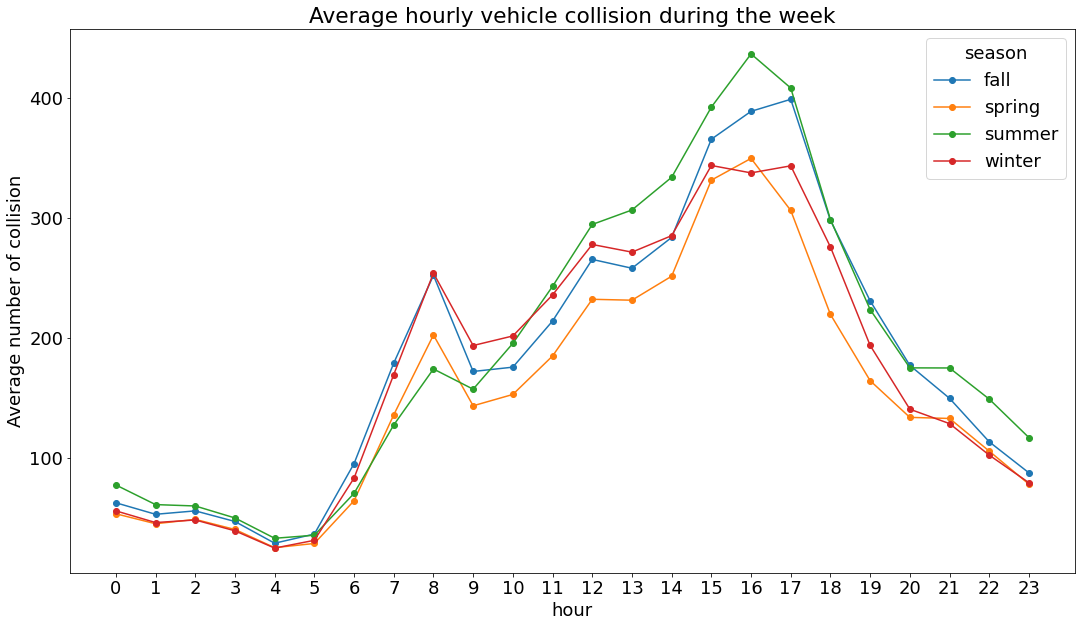

<Figure size 432x288 with 0 Axes>

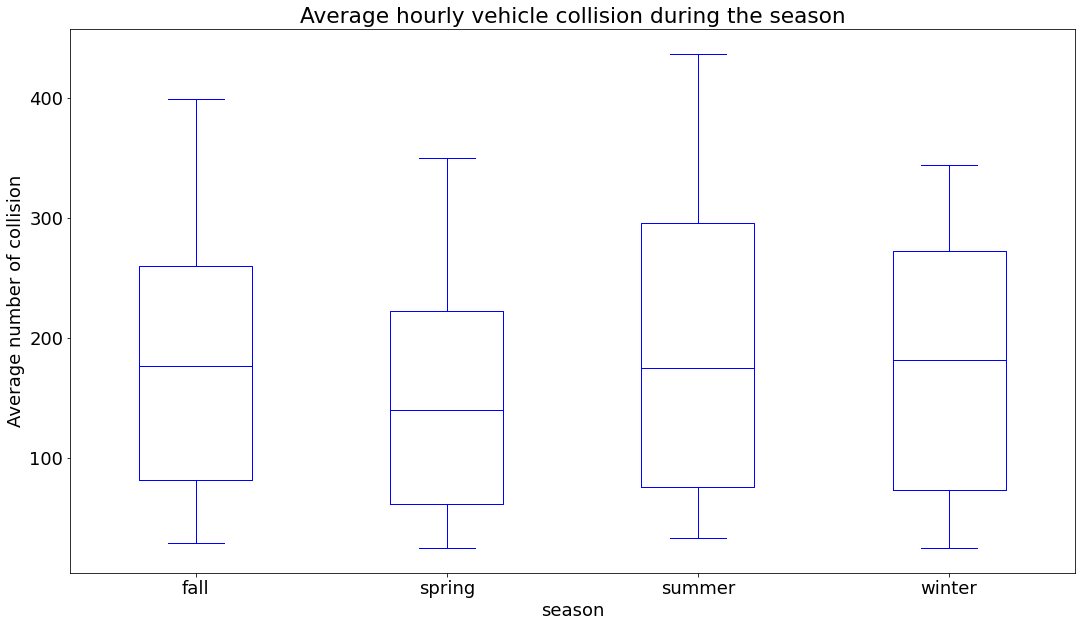

In [108]:
pivot_tab = df.pivot_table('num_of_collisions', index='hour', columns='season', aggfunc='mean')
pivot_tab2 = df.pivot_table('num_of_collisions', index='hour', columns='season', aggfunc='mean')

pivot_tab.plot(marker = 'o', figsize = (18,10))
plt.xlabel('hour')
plt.ylabel('Average number of collision')
plt.title('Average hourly vehicle collision during the week')
plt.xticks(np.arange(24))
plt.savefig('../images/fig1a.png')

plt.figure()
pivot_tab2.plot(kind = 'box', color = 'b', figsize = (18,10))
plt.xlabel('season')
plt.ylabel('Average number of collision')
plt.title('Average hourly vehicle collision during the season')
plt.savefig('../images/fig1b.png')
plt.show()

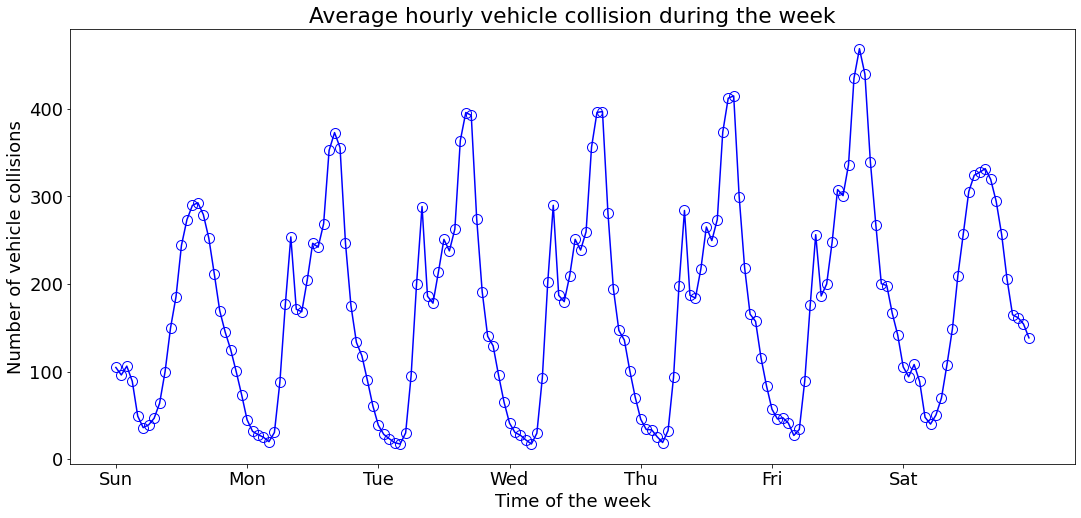

In [54]:
plt.figure(figsize=(18, 8))
average_week_collision = df.groupby(["weekday", "hour"]).mean()["num_of_collisions"]
average_week_collision.plot(color = 'b', marker = 'o', markerfacecolor='none', markersize = 10)
plt.title("Average hourly vehicle collision during the week")
labels = ["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"]
plt.xticks([i * 24 for i in range(7)], labels)
plt.xlabel("Time of the week")
plt.ylabel("Number of vehicle collisions")
plt.savefig('../images/fig2.png')
plt.show()

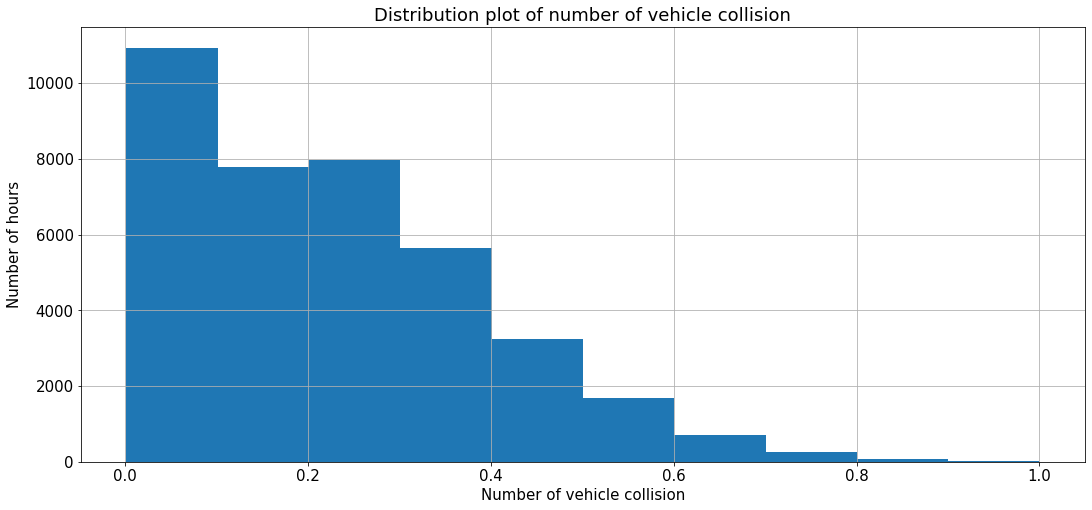

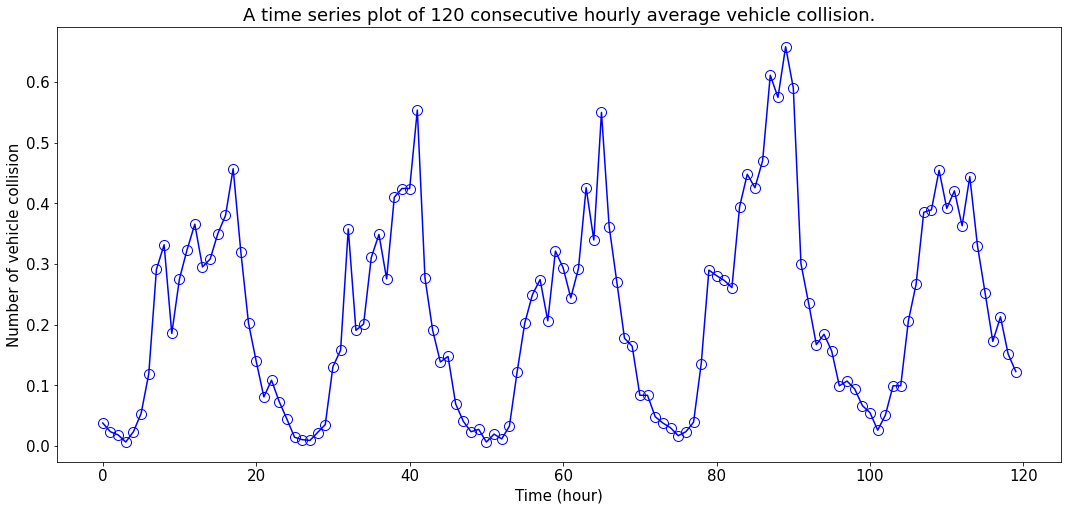

In [28]:
y = df.num_of_collisions/df.num_of_collisions.max()

y.hist(figsize=(18, 8))
plt.xlabel('Number of vehicle collision')
plt.ylabel('Number of hours')
plt.title('Distribution plot of number of vehicle collision')

plt.figure(figsize=(18, 8))
plt.plot(y.values[-120:],marker = 'o', markerfacecolor='none', markersize = 10, color="b")
plt.xlabel('Time (hour)')
plt.ylabel('Number of vehicle collision')
plt.title('A time series plot of 120 consecutive hourly average vehicle collision.')
plt.savefig('../images/fig3.png')
plt.show()

## Time series decomposition
The time series is decomposed using additive model as $x_t = T_t + S_t + R_t$, which shows the trend $R_t$, seasonality $S_t$, and residual $R_t$ components of the time series.  We have strong monthly seasonality in the data

<Figure size 720x576 with 0 Axes>

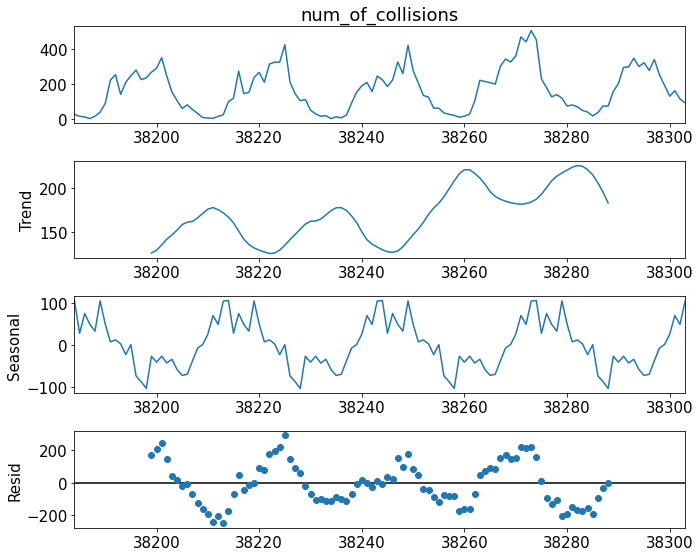

In [27]:
plt.figure()
rcParams['figure.figsize'] = 10,8
plt.rcParams.update({'font.size':15})

decomposition = seasonal_decompose(df.num_of_collisions.iloc[-120:], model='additive', period = 30)
decomposition.plot()
plt.show()

## Autocorrelation

Test statistic: -18.500950507326536
p-value: 2.120614902122503e-30
Critial Values (1%): -3.430521
Critial Values (5%): -2.861616
Critial Values (10%): -2.566810


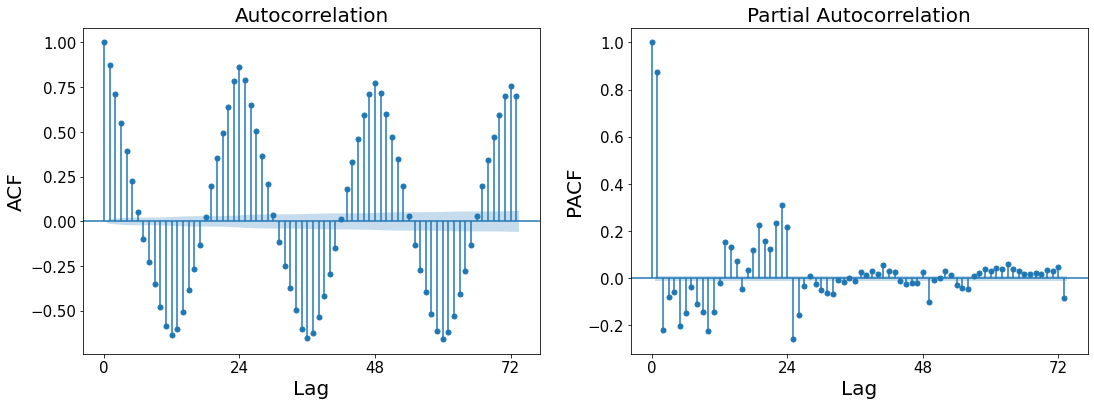

In [40]:
_, (ax1, ax2) = plt.subplots(1,2, figsize=(18,6))
ts = df.num_of_collisions
nlags = 73

# plot ACF
plot_acf(ts, lags=nlags,  ax=ax1)
ax1.set_xlabel('Lag', fontsize=20)
ax1.set_ylabel('ACF', fontsize=20)
ax1.set_xticks(np.arange(0,nlags, 24))
ax1.set_title('Autocorrelation', fontsize=20)

# plot PACF
plot_pacf(ts, lags=nlags, ax=ax2)
ax2.set_xlabel('Lag', fontsize=20)
ax2.set_ylabel('PACF', fontsize=20)
ax2.set_xticks(np.arange(0,nlags, 24))
ax2.set_title('Partial Autocorrelation', fontsize=20)

# perform Dickey-Fuller test
adf_results = adfuller(ts.values)
print('Test statistic:', adf_results[0])
print('p-value:', adf_results[1])
for key, value in adf_results[4].items():
    print('Critial Values (%s): %0.6f' % (key, value))